# P2: Exploring the Titanic Dataset

### Sangyoon Park | 28 FEB 2016

The sinking of the RMS Titanic in 1912 killed 1502 out of 2224 passengers and crew [1]. The tragedy immediately spurred an international sensation and led to awareness actions for better maritime safety regulations. Its sad memory still stays with us through the award-winning 1997 film *Titanic*.

In this investigation, I examine factors related to survival. It is known that more women and children survived the disaster as the result of the "women and children first" protocol followed during the time [1]. But to what extent is this true? The heroic account may have been subject to exaggeration. So I turn to the actual dataset on a subset of the Titanic passengers and see what it tells about gender and age in survival. I also examine other factors that may be related to survival such as socio-economic status and family members aboard.

## 1. Examining the Dataset

We start with some preliminary observations on our dataset.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%pylab inline

path = 'C:/Users/Sangyoon Park/Desktop/Udacity_DAND/P2/'
titanic_df = pd.read_csv(path + 'titanic_data.csv')

# Checking the dimension of the dataset
print titanic_df.shape
# Checking the given variables in the dataset
print titanic_df.columns.values

Populating the interactive namespace from numpy and matplotlib
(891, 12)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


We see that the dataset contains 891 observations (i.e. passengers) and 12 variables (i.e. passenger information).

Let's now take a look at some entries in the dataset.

In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.iloc[100:110]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28,0,0,349245,7.8958,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21,0,1,35281,77.2875,D26,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33,0,0,7540,8.6542,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37,2,0,3101276,7.9250,NaN,S
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28,0,0,349207,7.8958,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21,0,0,343120,7.6500,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
108,109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,NaN,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q


In [4]:
titanic_df.iloc[500:510]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
500,501,0,3,"Calic, Mr. Petar",male,17,0,0,315086,8.6625,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21,0,0,364846,7.7500,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37,0,0,4135,9.5875,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16,0,0,110152,86.5000,B79,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18,1,0,PC 17758,108.9000,C65,C
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33,0,2,26360,26.0000,NaN,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
508,509,0,3,"Olsen, Mr. Henry Margido",male,28,0,0,C 4001,22.5250,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26,0,0,1601,56.4958,NaN,S


Now, let's get some descriptive statistics for the applicable (i.e. continuous) variables in the dataset.

In [5]:
titanic_df[ ['Age', 'SibSp', 'Parch', 'Fare'] ].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


We see that all these four variables, *Age* and *Fare* in particular, have potential outliers as the maximum is much greater than the upper quartile (i.e. 75% percentile). We will examine the distribution of each of these variables in the respective section below.

We also notice that the count for *Age* is less than 891. This is because *Age* contains NaN's as shown in the entries above. We should keep this in mind for our later analyses.

## 2. Survivors vs. Non-Survivors

Before examining each individual variable in detail, let's roughly compare the survivor and non-survivor groups.

In [6]:
# Grouping into survivors and non-survivors
survivors_df = titanic_df[ titanic_df['Survived']==1 ]
non_survivors_df = titanic_df[ titanic_df['Survived']==0 ]
print 'Number of Passengers:', len(titanic_df)
print 'Number of Survivors:', len(survivors_df)
print 'Number of Non-Survivors:', len(non_survivors_df)

Number of Passengers: 891
Number of Survivors: 342
Number of Non-Survivors: 549


Only 342 survived out of 891 passengers. 

Let's briefly compare the two groups.

In [7]:
survivors_df[ ['Age', 'SibSp', 'Parch', 'Fare'] ].describe()

,Age,SibSp,Parch,Fare
count,290.000000,342.000000,342.000000,342.000000
mean,28.343690,0.473684,0.464912,48.395408
std,14.950952,0.708688,0.771712,66.596998
min,0.420000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,12.475000
50%,28.000000,0.000000,0.000000,26.000000
75%,36.000000,1.000000,1.000000,57.000000
max,80.000000,4.000000,5.000000,512.329200


In [8]:
non_survivors_df[ ['Age', 'SibSp', 'Parch', 'Fare'] ].describe()

,Age,SibSp,Parch,Fare
count,424.000000,549.000000,549.000000,549.000000
mean,30.626179,0.553734,0.329690,22.117887
std,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.854200
50%,28.000000,0.000000,0.000000,10.500000
75%,39.000000,1.000000,0.000000,26.000000
max,74.000000,8.000000,6.000000,263.000000


We easily notice that fare is much higher for the survivor group.

Let's now turn to individual variables and their relationship to survival.

## 3. Gender and Survival

As mentioned in the beginning, it is known that more women survived the disaster as the result of the "women and children first" protocol followed during the time [1]. But we examine whether our dataset actually agrees with this report and, if so, to what extent.

First, we examine the basic breakdown of survival vs. gender.

In [9]:
# Basic breakdown
def survival_breakdown(variable_of_interest):
    return pd.pivot_table(titanic_df, index='Survived', columns=variable_of_interest, 
                          values='PassengerId', aggfunc=len, margins=True, fill_value=0)

print '< Number of Males and Females by Survival >'
print survival_breakdown('Sex')

< Number of Males and Females by Survival >
Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891


Next, we examine the gender difference in survival though visualization.

< Survival Rate by Gender >
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


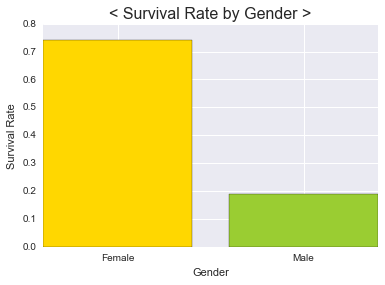

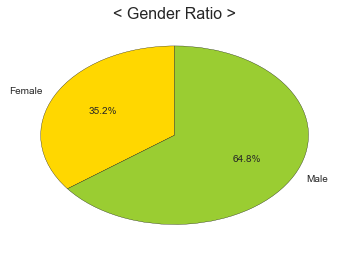

In [10]:
# Gender and survival
grouped_by_gender = titanic_df.groupby('Sex')
print '< Survival Rate by Gender >'
print grouped_by_gender['Survived'].mean()

# Plotting
def plot_bar(title, x_label, x_names, x_colors, y_label, y_values, show=True):
    x_values = range( len(y_values) )
    plt.bar(x_values, y_values, color=x_colors, align='center')
    plt.xticks(x_values, x_names)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, size=16)
    if (show == True):
        plt.show()

def plot_pie(title, nums, labels, colors, show=True):
    plt.pie(nums, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(title, size=16)
    if (show == True):
        plt.show()

survival_rate_by_gender = list( grouped_by_gender['Survived'].mean() )
plot_bar('< Survival Rate by Gender >', 
         'Gender', ['Female', 'Male'], ['gold', 'yellowgreen'], 
         'Survival Rate', survival_rate_by_gender)

plot_pie('< Gender Ratio >', grouped_by_gender.size(), 
         ['Female', 'Male'], ['gold', 'yellowgreen'])

The survival rate is considerably higher for females than for males! We may conduct the chi-square test to examine if the difference is statistically significant. The test is applicable since each observed cell frequency is greater than 5, as we saw in the contingency table above.

In [11]:
# Conducting the chi-square test 
tab_gender = survival_breakdown('Sex')
tab_gender_observed = tab_gender.ix[0:-1, 0:-1]   # Get table without totals
stats.chi2_contingency(observed=tab_gender_observed)

(260.71702016732104,
 1.1973570627755645e-58,
 1L,
 array([[ 193.47474747,  355.52525253],
        [ 120.52525253,  221.47474747]]))

We see that the p-value is significantly small (*p < .001*), so we can reject the null hypothesis that gender and survival are independent. In other words, there is a relationship between gender and survival. Specifically, our observed result supports that being a female is related to a higher chance of survival.

## 4. Age and Survival

We now turn to the relationship between age and survival. Is it true that more children survived the disaster as the result of the "women and children first" protocol? If so, to what extent is it true?

Also, is there another age group (or groups) that displays a particularly higher (or lower) survival rate? For instance, is it the case that elderly passengers had a better chance of survival due to the similar rescue protocol that gives them priority?

We investigate these questions in the following analysis.

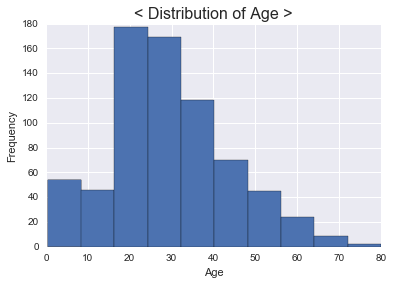

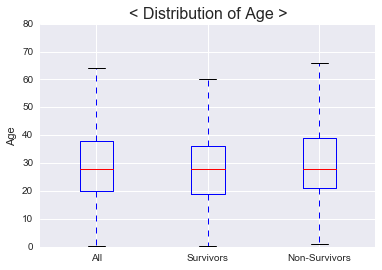

In [12]:
# Plotting histogram for age
plt.hist( titanic_df['Age'].dropna() )   # Removing NaN
plt.title('< Distribution of Age >', size=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting box plot for age
age_boxplot_data = [titanic_df['Age'].dropna(), 
                    survivors_df['Age'].dropna(), 
                    non_survivors_df['Age'].dropna()]
age_boxplot_labels = ['All', 'Survivors', 'Non-Survivors']
plt.boxplot(age_boxplot_data, labels=age_boxplot_labels)
plt.title('< Distribution of Age >', size=16)
plt.ylabel('Age')
plt.show()

In [13]:
grouped_by_survival = titanic_df.groupby('Survived')
print '< Average Age by Survival Status >'
print grouped_by_survival['Age'].mean()

< Average Age by Survival Status >
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


Survivors are a bit younger than non-survivors but the difference in the average age is quite small. For more effective examination of the relationship between age and survival, we categorize passenger into 5 age groups as follows.

In [14]:
# Creating a new categorical variable for age
def age_categorize(age_num):
    if np.isnan(age_num):
        return None
    elif (age_num <= 15):
        return '15 or below'
    elif (age_num >= 16) and (age_num < 30):
        return '16 to 29'
    elif (age_num >= 30) and (age_num < 45):
        return '30 to 44'
    elif (age_num >= 45) and (age_num < 60):
        return '45 to 59'
    else:
        return '60 or above'

titanic_df['AgeCat'] = pd.Series( titanic_df['Age'].apply(age_categorize) )

# Checking the result
titanic_df.iloc[450:459]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat
450,451,0,2,"West, Mr. Edwy Arthur",male,36,1,2,C.A. 34651,27.7500,NaN,S,30 to 44
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S,None
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30,0,0,113051,27.7500,C111,C,30 to 44
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49,1,0,17453,89.1042,C92,C,45 to 59
454,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S,None
455,456,1,3,"Jalsevac, Mr. Ivan",male,29,0,0,349240,7.8958,NaN,C,16 to 29
456,457,0,1,"Millet, Mr. Francis Davis",male,65,0,0,13509,26.5500,E38,S,60 or above
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S,None
458,459,1,2,"Toomey, Miss. Ellen",female,50,0,0,F.C.C. 13531,10.5000,NaN,S,45 to 59


Let's now examine the survival rate for each age group.

< Survival Rate by Age Group >
AgeCat
15 or below    0.590361
16 to 29       0.355482
30 to 44       0.423256
45 to 59       0.404494
60 or above    0.269231
Name: Survived, dtype: float64


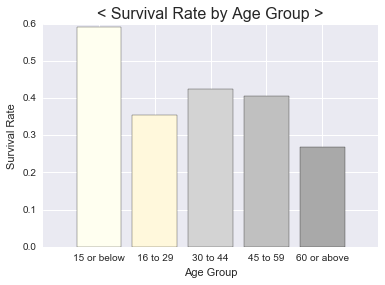

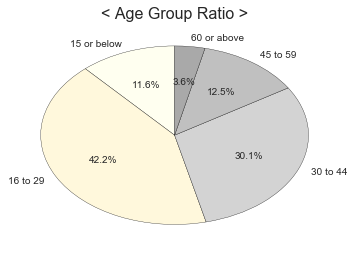

In [15]:
# Age and survival
grouped_by_age = titanic_df.groupby('AgeCat')
print '< Survival Rate by Age Group >'
print grouped_by_age['Survived'].mean()

# Plotting
survival_rate_by_age = list( grouped_by_age['Survived'].mean() )
plot_bar('< Survival Rate by Age Group >', 
         'Age Group', 
         ['15 or below', '16 to 29', '30 to 44', '45 to 59', '60 or above'], 
         ['ivory', 'cornsilk', 'lightgray', 'silver', 'darkgray'], 
         'Survival Rate', survival_rate_by_age)

plot_pie('< Age Group Ratio >', grouped_by_age.size(), 
         ['15 or below', '16 to 29', '30 to 44', '45 to 59', '60 or above'], 
         ['ivory', 'cornsilk', 'lightgray', 'silver', 'darkgray'])

We indeed see that the youngest age group (15 or below) displays a higher survival rate than other age groups.

It is noteworthy that the result also shows that young adults (ages 16 to 29) had a relatively low chance of survival. Could it be that these passengers were more capable and willing to help other passengers and this came at the cost of their own safety and chance of survival?

It is also interesting that the eldest age group (60 or above) displays the lowest survival rate. One possible interpretation is that these passengers were physically too weak to cope with the hardships of the crisis. One may also speculate whether these individuals willingly gave up on their lives since they have lived long enough! But we should also keep in mind that this age group is quite small (only 26 passengers) so any generalization is more limited.

In [16]:
# Basic breakdown
print '< Survival by Age Group >'
print survival_breakdown('AgeCat')

< Survival by Age Group >
AgeCat    15 or below  16 to 29  30 to 44  45 to 59  60 or above  All
Survived                                                             
0                  34       194       124        53           19  549
1                  49       107        91        36            7  342
All                83       301       215        89           26  891


Fortunately, every cell frequency is greater than 5 in the contingency table, so we may conduct the chi-square test to examine whether age and survival are independent from each other.

In [17]:
# Conducting the chi-square test 
tab_age = survival_breakdown('AgeCat')
tab_age_observed = tab_age.ix[0:-1, 0:-1]   # Get table without totals
stats.chi2_contingency(observed=tab_age_observed)

(17.163877132162035,
 0.0017962418837390271,
 4L,
 array([[  49.28851541,  178.74509804,  127.67507003,   52.85154062,
           15.43977591],
        [  33.71148459,  122.25490196,   87.32492997,   36.14845938,
           10.56022409]]))

The p-value is significantly small (*p < .01*), so we can reject the null hypothesis that age and survival are independent. In other words, there is a relationship between age and survival. It is noteworthy, however, that the p-value, though small, is not as small as the one we obtained earlier for gender. This may suggest that age is not as strong a predictor of survival as gender.

## 5. Socio-Economic Status and Survival

As we observed earlier, fare seems to be quite higher for the survivor group. Is it possible that wealthier passengers had a better chance of survival? The dataset has two variables that are relevant to the socio-economic status of the passengers: passenger class and fare. We examine both variables in their relationship to survival.

As before, we start with the contingency table.

In [18]:
# Basic breakdown
print '< Survival by Passenger Class >'
print survival_breakdown('Pclass')

< Survival by Passenger Class >
Pclass      1    2    3  All
Survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891


Noting that each cell frequency is greater than 5, we proceed to examine the relationship between passenger class and survival.

< Survival Rate by Passenger Class >
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


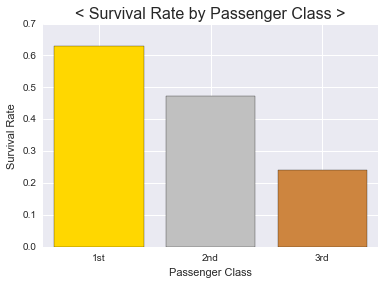

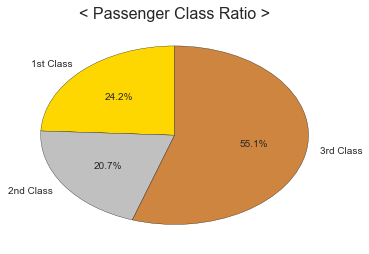

In [19]:
# Survival by passenger class
grouped_by_passenger_class = titanic_df.groupby('Pclass')
print '< Survival Rate by Passenger Class >'
print grouped_by_passenger_class['Survived'].mean()

# Plotting
survival_rate_by_passenger_class = list( grouped_by_passenger_class['Survived'].mean() )
plot_bar('< Survival Rate by Passenger Class >', 
         'Passenger Class', ['1st', '2nd', '3rd'], ['gold', 'silver', 'peru'], 
         'Survival Rate', survival_rate_by_passenger_class)

plot_pie('< Passenger Class Ratio >', grouped_by_passenger_class.size(), 
         ['1st Class', '2nd Class', '3rd Class'], ['gold', 'silver', 'peru'])

We see that a better passenger class displays a higher survival rate. Let's conduct the chi-square test to examine if the observed result is statistically significant. Recall that every cell frequency is greater than 5 in the contingency table.

In [20]:
# Conducting the chi-square test 
tab_passenger_class = survival_breakdown('Pclass')
tab_passenger_class_observed = tab_passenger_class.ix[0:-1, 0:-1]   # Get table without totals
stats.chi2_contingency(observed=tab_passenger_class_observed)

(102.88898875696056,
 4.5492517112987927e-23,
 2L,
 array([[ 133.09090909,  113.37373737,  302.53535354],
        [  82.90909091,   70.62626263,  188.46464646]]))

We see that the p-value is significantly small (*p < .001*), so we can reject the null hypothesis that passenger class (socio-economic status) and survival are independent. In other words, there is a relationship between socio-economic status and survival.

Let's now examine the relationship between fare and survival.

< Average Fare by Survival >
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


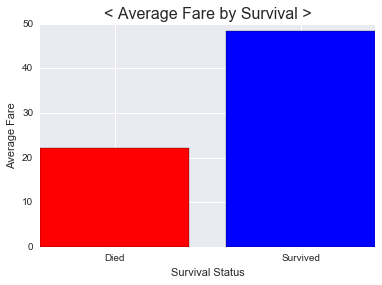

In [21]:
# Fare and survival
print '< Average Fare by Survival >'
print grouped_by_survival['Fare'].mean()

# Plotting
average_fare_by_survival = list( grouped_by_survival['Fare'].mean() )
plot_bar('< Average Fare by Survival >', 
         'Survival Status', ['Died', 'Survived'], ['red', 'blue'], 
         'Average Fare', average_fare_by_survival)

We see that the average fare for the survivors is more than twice as high as the average fare for the non-survivors. The following independent samples t-test confirms that this difference is not by random chance (*p < .001*).

In [22]:
stats.ttest_ind(survivors_df['Fare'], non_survivors_df['Fare'], equal_var=False)

Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)

Finally, we examine the relationship between fare and passenger class to ensure that these two variables reflect/measure the same attribute: socio-economic status.

< Average Fare by Passenger Class>
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


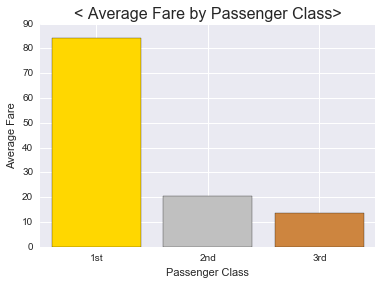

In [23]:
# Fare by passenger class
print '< Average Fare by Passenger Class>'
print grouped_by_passenger_class['Fare'].mean()

# Plotting
average_fare_by_passenger_class = list( grouped_by_passenger_class['Fare'].mean() )
plot_bar('< Average Fare by Passenger Class>', 
         'Passenger Class', ['1st', '2nd', '3rd'], ['gold', 'silver', 'peru'], 
         'Average Fare', average_fare_by_passenger_class)

Not surprisingly, we find that better passenger class is correlated with higher fare.

In sum, we see that passengers of higher socio-economic status had a better chance of survival.

## 6. Port of Embarkation and Survival

We also examine whether each passenger's port of embarkation can be a predictor for his/her survival status.

In [24]:
# Basic breakdown
print '< Survival by Port of Embarkation >'
print survival_breakdown('Embarked')

< Survival by Port of Embarkation >
Embarked    C   Q    S  All
Survived                   
0          75  47  427  549
1          93  30  217  342
All       168  77  644  891


< Survival Rate by Port of Embarkation >
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


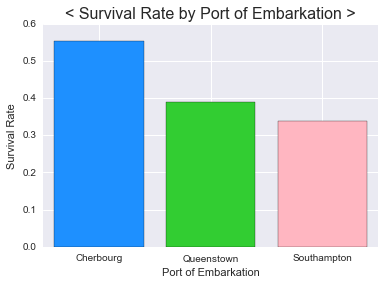

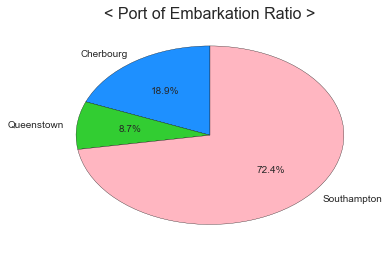

In [25]:
# Port of embarkation and survival
grouped_by_embarked_port = titanic_df.groupby('Embarked')
print '< Survival Rate by Port of Embarkation >'
print grouped_by_embarked_port['Survived'].mean()

# Plotting
survival_rate_by_embarked_port = list( grouped_by_embarked_port['Survived'].mean() )
plot_bar('< Survival Rate by Port of Embarkation >', 
         'Port of Embarkation', 
         ['Cherbourg', 'Queenstown', 'Southampton'], 
         ['dodgerblue', 'limegreen', 'lightpink'], 
         'Survival Rate', survival_rate_by_embarked_port)

plot_pie('< Port of Embarkation Ratio >', grouped_by_embarked_port.size(), 
         ['Cherbourg', 'Queenstown', 'Southampton'], 
         ['dodgerblue', 'limegreen', 'lightpink'])

In [26]:
# Conducting the chi-square test 
tab_embarked_port = survival_breakdown('Embarked')
tab_embarked_port_observed = tab_embarked_port.ix[0:-1, 0:-1]   # Get table without totals
stats.chi2_contingency(observed=tab_embarked_port_observed)

(26.489149839237619,
 1.769922284120912e-06,
 2L,
 array([[ 103.7480315,   47.5511811,  397.7007874],
        [  64.2519685,   29.4488189,  246.2992126]]))

Interestingly, passengers who embarked from Cherbourg ("C") show a higher survival rate. Furthermore, the chi-square test supports that this is highly likely not by random chance. Why? What might be so special about Cherbourg? Could this be related to the socio-economic factor?

< Average Fare by Port of Embarkation >
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


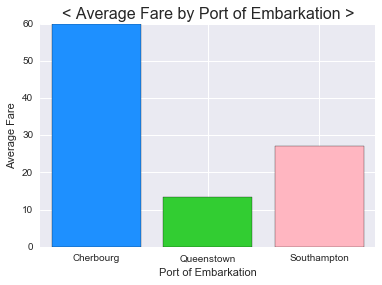

In [27]:
# Fare by port of embarkation
print '< Average Fare by Port of Embarkation >'
print grouped_by_embarked_port['Fare'].mean()

# Plotting
average_fare_by_embarked_port = list( grouped_by_embarked_port['Fare'].mean() )
plot_bar('< Average Fare by Port of Embarkation >', 
         'Port of Embarkation', 
         ['Cherbourg', 'Queenstown', 'Southampton'], 
         ['dodgerblue', 'limegreen', 'lightpink'], 
         'Average Fare', average_fare_by_embarked_port)

We see that passenger who embarked from Cherbourg ("C") indeed have higher socio-economic status.

Hence, we can make the following conjectures. First, the reason why passengers from Cherbourg had a better chance of survival primarily has to do with their higher socio-economic status. Second, Cherbourg (in northern France) of the time was probably wealthier than Queenstown (now Cobh; in southern Ireland) or Southampton (in southern England).

But what about Queenstown and Southampton? The result indicates that passengers from Southampton are probably more well-off than passengers from Queenstown. Then why is it that their survival is no better than that for the latter?

Since socio-economic status is not the only predictor for survival, we may suspect that another factor is in play. Gender may be the culprit.

< Gender Ratio by Port of Embarkation >
Sex         female      male  All
Embarked                         
C         0.434524  0.565476    1
Q         0.467532  0.532468    1
S         0.315217  0.684783    1
All       0.352413  0.647587    1


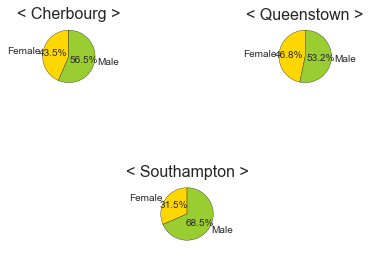

In [28]:
# Calculating gender ratio for each port
tab_gender_by_port = pd.pivot_table(titanic_df, index='Embarked', columns='Sex', 
                                    values='PassengerId', aggfunc=len, margins=True, fill_value=0)
tab_gender_by_port_pct = tab_gender_by_port.div(tab_gender_by_port.iloc[:,-1], axis=0)
print '< Gender Ratio by Port of Embarkation >'
print tab_gender_by_port_pct

# Plotting gender ratio for each port
gender_Cherbourg = tab_gender_by_port.ix[0:-1, 0:-1].loc['C']
gender_Queenstown = tab_gender_by_port.ix[0:-1, 0:-1].loc['Q']
gender_Southampton = tab_gender_by_port.ix[0:-1, 0:-1].loc['S']

grid = GridSpec(3, 3)
plt.subplot(grid[0, 0], aspect=1)
plot_pie('< Cherbourg >', gender_Cherbourg, 
         ['Female', 'Male'], ['gold', 'yellowgreen'], show=False)
plt.subplot(grid[0, 2], aspect=1)
plot_pie('< Queenstown >', gender_Queenstown, 
         ['Female', 'Male'], ['gold', 'yellowgreen'], show=False)
plt.subplot(grid[2, 1], aspect=1)
plot_pie('< Southampton >', gender_Southampton, 
         ['Female', 'Male'], ['gold', 'yellowgreen'], show=False)

In fact, the passenger group from Southampton has a greater male ratio than other groups! As we saw earlier, being a female is associated with a higher chance of survival. Differently put, being a male is associated with a lower chance of survival. Hence, the following can be claimed for the passengers from Southampton: the positive effect of their (relatively) higher socio-economic status on survival is offset by their (relatively) greater male ratio (68.5%). This contrast with the passengers from Queenstown, whose overall socio-economic status is relatively lower yet whose male ratio is also relatively smaller (53.2%).

This combined effect of gender and socio-economic status also fits well with what we observe for the passenger group from Cherbourg. As we saw earlier, the group displays a distinctively high socio-economic status. Furthermore, our result shows that the same group also has a relatively intermediate male ratio (56.5%). It then logically follows that the group should display a high survival rate, which is exactly what we observe from our dataset.

## 7. Family and Survival

Finally, we explore the relationship between each passenger's family status aboard and his/her survival. For this, we create a new variable *FamNum* by combining *SibSp* (number of siblings/spouses aboard) and *Parch* (number of parents/children aboard).

In [29]:
# Creating a new variable for the number of family members aboard
titanic_df['FamNum'] = pd.Series(titanic_df['SibSp'] + titanic_df['Parch'])

In [30]:
# Checking the result
titanic_df.iloc[450:459]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,FamNum
450,451,0,2,"West, Mr. Edwy Arthur",male,36,1,2,C.A. 34651,27.7500,NaN,S,30 to 44,3
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S,None,1
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30,0,0,113051,27.7500,C111,C,30 to 44,0
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49,1,0,17453,89.1042,C92,C,45 to 59,1
454,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S,None,0
455,456,1,3,"Jalsevac, Mr. Ivan",male,29,0,0,349240,7.8958,NaN,C,16 to 29,0
456,457,0,1,"Millet, Mr. Francis Davis",male,65,0,0,13509,26.5500,E38,S,60 or above,0
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S,None,1
458,459,1,2,"Toomey, Miss. Ellen",female,50,0,0,F.C.C. 13531,10.5000,NaN,S,45 to 59,0


Let's examine the distribution.

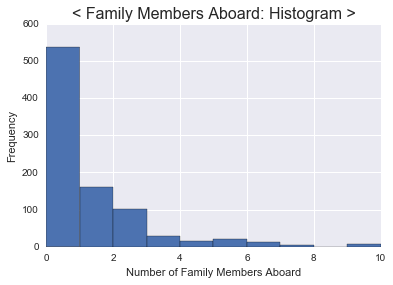

In [31]:
# Plotting histogram for the number of family members aboard
plt.hist( titanic_df['FamNum'] )
plt.title('< Family Members Aboard: Histogram >', size=16)
plt.xlabel('Number of Family Members Aboard')
plt.ylabel('Frequency')
plt.show()

We see that most passengers had less than 2 family members aboard.

Let's now categorize the variable to more effectively examine its relationship to survival.

In [32]:
# Creating a new categorical variable for the number of family members aboard
def fam_categorize(fam_num):
    if (fam_num >= 6):
        return '6 or more'
    if (fam_num >= 4 and fam_num <= 5):
        return '4 to 5'
    if (fam_num >= 2 and fam_num <= 3):
        return '2 to 3'
    if (fam_num == 1):
        return '1'
    if (fam_num == 0):
        return '0'

titanic_df['FamNumCat'] = pd.Series( titanic_df['FamNum'].apply(fam_categorize) )

# Checking the result
titanic_df.iloc[450:459]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,FamNum,FamNumCat
450,451,0,2,"West, Mr. Edwy Arthur",male,36,1,2,C.A. 34651,27.7500,NaN,S,30 to 44,3,2 to 3
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S,None,1,1
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30,0,0,113051,27.7500,C111,C,30 to 44,0,0
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49,1,0,17453,89.1042,C92,C,45 to 59,1,1
454,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S,None,0,0
455,456,1,3,"Jalsevac, Mr. Ivan",male,29,0,0,349240,7.8958,NaN,C,16 to 29,0,0
456,457,0,1,"Millet, Mr. Francis Davis",male,65,0,0,13509,26.5500,E38,S,60 or above,0,0
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S,None,1,1
458,459,1,2,"Toomey, Miss. Ellen",female,50,0,0,F.C.C. 13531,10.5000,NaN,S,45 to 59,0,0


And we examine the survival rate for each group.

< Survival Rate by the Number of Family Members Aboard >
FamNumCat
0            0.303538
1            0.552795
2 to 3       0.610687
4 to 5       0.162162
6 or more    0.160000
Name: Survived, dtype: float64


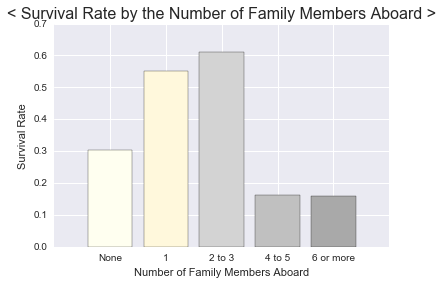

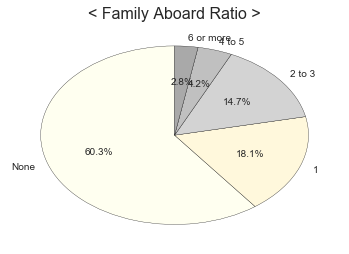

In [33]:
# Number of family members aboard and survival
grouped_by_family_size = titanic_df.groupby('FamNumCat')
print '< Survival Rate by the Number of Family Members Aboard >'
print grouped_by_family_size['Survived'].mean()

# Plotting
survival_rate_by_family_size = list( grouped_by_family_size['Survived'].mean() )
plot_bar('< Survival Rate by the Number of Family Members Aboard >', 
         'Number of Family Members Aboard', 
         ['None', '1', '2 to 3', '4 to 5', '6 or more'], 
         ['ivory', 'cornsilk', 'lightgray', 'silver', 'darkgray'], 
         'Survival Rate', survival_rate_by_family_size)

plot_pie('< Family Aboard Ratio >', grouped_by_family_size.size(), 
         ['None', '1', '2 to 3', '4 to 5', '6 or more'], 
         ['ivory', 'cornsilk', 'lightgray', 'silver', 'darkgray'])

We observe that the survival rate displays three distinctive "baskets", namely "No family members aboard", "1 to 3 aboard", and "4 or more aboard". Accordingly, we re-categorize the number of family members aboard as follows.

< Survival Rate by the Number of Family Members Aboard >
FamNumCat
0            0.303538
1 to 3       0.578767
4 or more    0.161290
Name: Survived, dtype: float64


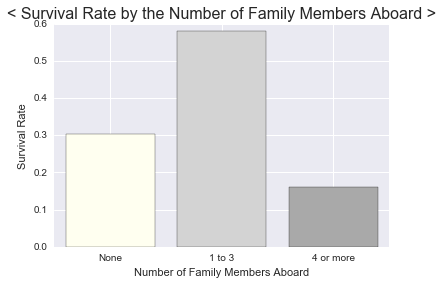

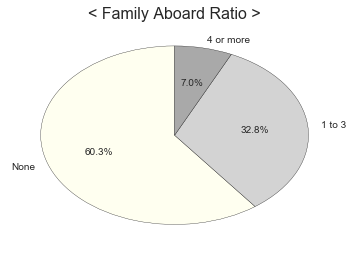

In [34]:
# Modifying the categorical variable
def fam_recategorize(fam_num):
    if (fam_num >= 4):
        return '4 or more'
    if (fam_num >= 1 and fam_num <= 3):
        return '1 to 3'
    if (fam_num == 0):
        return '0'

titanic_df['FamNumCat'] = pd.Series( titanic_df['FamNum'].apply(fam_recategorize) )

# Number of family members aboard and survival
grouped_by_family_size = titanic_df.groupby('FamNumCat')
print '< Survival Rate by the Number of Family Members Aboard >'
print grouped_by_family_size['Survived'].mean()

# Plotting
survival_rate_by_family_size = list( grouped_by_family_size['Survived'].mean() )
plot_bar('< Survival Rate by the Number of Family Members Aboard >', 
         'Number of Family Members Aboard', 
         ['None', '1 to 3', '4 or more'], 
         ['ivory', 'lightgray', 'darkgray'], 
         'Survival Rate', survival_rate_by_family_size)

plot_pie('< Family Aboard Ratio >', grouped_by_family_size.size(), 
         ['None', '1 to 3', '4 or more'], ['ivory', 'lightgray', 'darkgray'])

With the new categorization, the pattern becomes more pronounced, namely that the passenger's survival rate is much higher when he or she has a small number (1 to 3) of family members aboard than when he or she is aboard by him/herself. But the association between having family aboard and a higher chance of survival breaks down once the family size gets large (4 or more). In such a case, the survival rate is even lower than when the passenger is aboard by him/herself. One may attempt to interpret---rather generalize---this to mean that being with a *small* number of family members helps to survive a crisis but having too many of them is detrimental.

It is worth noting that this observation agrees with a previous analysis of the dataset [2], which found that having 4 family members or more aboard is associated with a low chance of survival. The current analysis further contributes to this previous finding by specifying a caveat that the *number* of family members matters. The company of a *manageable* number of close ones can help to successfully navigate a crisis.

As with previous analyses, we employ the chi-square test to examine whether this observation is statistically significant.

In [35]:
# Basic breakdown
print '< Number of Passengers with Family Members Aboard >'
print survival_breakdown('FamNumCat')

< Number of Passengers with Family Members Aboard >
FamNumCat    0  1 to 3  4 or more  All
Survived                              
0          374     123         52  549
1          163     169         10  342
All        537     292         62  891


In [36]:
# Conducting the chi-square test 
tab_family_size = survival_breakdown('FamNumCat')
tab_family_size_observed = tab_family_size.ix[0:-1, 0:-1]   # Get table without totals
stats.chi2_contingency(observed=tab_family_size_observed)

(74.537249046982396,
 6.5229195366404726e-17,
 2L,
 array([[ 330.87878788,  179.91919192,   38.2020202 ],
        [ 206.12121212,  112.08080808,   23.7979798 ]]))

We see that the p-value is significantly small (*p < .001*), so we can reject the null hypothesis that having family aboard and survival are independent. In other words, there is a relationship between having family aboard and survival.

## Conclusion

In this investigation, I examined several factors that may be related to survival in the Titanic disaster using visualization and statistical tests. The result indicates that the two commonly known factors of age and gender are in fact related to survival. Specifically, being a female and being a child are related to a higher chance of survival. The result also indicates that higher socio-economic status and the company of a small *manageable* number (1 to 3) of family members are related to a higher chance of survival.

## References
* [1] A webpage on the RMS Titanic and its sinking: https://en.wikipedia.org/wiki/RMS_Titanic

* [2] A previous analysis of the Titanic dataset: https://www.kaggle.com/jasonm/titanic/large-families-not-good-for-survival

* [3] Consulted for conducting the chi-square test in Python: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html

* [4] Consulted for conducting the t-test in Python: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html

* [5] Consulted for using colors in Python plots: http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib